In [2]:
import network.layers as layers
import network.loss as loss
from nnfs.datasets import spiral_data
import network.optimizers as optimizers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from utils.visualize import visualize_model_decision_boundaries

In [3]:
X, y = spiral_data(samples=100, classes=3)

In [4]:
class Model():
    def __init__(self):        
        self.dense_1 = layers.Dense(2, 64)
        self.activation_1 = layers.Relu()
        self.dense_2 = layers.Dense(64, 3)
        self.activation_2 = layers.Softmax()

        self.loss_f = None
        
        self.optimizer = None

        self.metrics = []
    
    def forward(self, X, y):
        if len(y.shape) == 2:
            self.y = np.argmax(y, axis=1)
        else:
            self.y = y
        
        self.__forward_pass(X)
    
    def __forward_pass(self, X):
        self.dense_1.forward(X)
        self.activation_1.forward(self.dense_1.output)
        self.dense_2.forward(self.activation_1.output)
        self.activation_2.forward(self.dense_2.output)

    def calculate_loss(self):
        self.loss = self.loss_f.calculate(self.activation_2.output, self.y)
        return self.loss
    
    def calculate_metrics(self):
        self.metrics_dict = {}
        if 'accuracy' in self.metrics:
            predictions = np.argmax(self.activation_2.output, axis=1)
            accuracy = np.mean(predictions==self.y)
            self.metrics_dict['accuracy'] = float(accuracy)
        
        return self.metrics_dict
    
    def backward(self):
        self.loss_f.backward(self.activation_2.output, self.y)
        self.activation_2.backward(self.loss_f.d_inputs)
        self.dense_2.backward(self.activation_2.d_inputs)
        self.activation_1.backward(self.dense_2.d_inputs)
        self.dense_1.backward(self.activation_1.d_inputs)

        self.optimizer.update_weights(self.dense_2)
        self.optimizer.update_weights(self.dense_1)  
    
    def predict(self, X):
        self.__forward_pass(X)
        proba_ = self.activation_2.output
        classes = np.argmax(proba_, axis=1)
        return proba_, classes

In [5]:
model = Model()
model.optimizer = optimizers.SGD(lr=1.0)
model.loss_f = loss.CategoricalCrossEntropy()
model.metrics = ['accuracy']

In [6]:
orignal_weights = model.dense_1.weights.copy()

In [7]:
loss_arr = []
accuracy_arr = []
learning_rate_arr = []

for epoch in range(10001):
    model.forward(X, y)

    loss = model.calculate_loss()
    loss_arr.append(loss)

    metrics = model.calculate_metrics()
    accuracy_arr.append(metrics['accuracy'])

    if (epoch % 100) == 0:
        print(f"epoch: {epoch}, acc: {round(metrics['accuracy'], 2)}, loss: {round(loss, 2)}")
    
    learning_rate_arr.append(model.optimizer.learning_rate)

    model.backward()

epoch: 0, acc: 0.39, loss: 1.1
epoch: 100, acc: 0.42, loss: 1.07
epoch: 200, acc: 0.42, loss: 1.06
epoch: 300, acc: 0.43, loss: 1.06
epoch: 400, acc: 0.46, loss: 1.06
epoch: 500, acc: 0.48, loss: 1.04
epoch: 600, acc: 0.5, loss: 1.03
epoch: 700, acc: 0.47, loss: 1.02
epoch: 800, acc: 0.46, loss: 1.0
epoch: 900, acc: 0.45, loss: 0.98
epoch: 1000, acc: 0.5, loss: 0.96
epoch: 1100, acc: 0.47, loss: 0.94
epoch: 1200, acc: 0.53, loss: 0.94
epoch: 1300, acc: 0.5, loss: 0.96
epoch: 1400, acc: 0.55, loss: 0.88
epoch: 1500, acc: 0.53, loss: 0.88
epoch: 1600, acc: 0.61, loss: 0.83
epoch: 1700, acc: 0.62, loss: 0.84
epoch: 1800, acc: 0.6, loss: 0.83
epoch: 1900, acc: 0.48, loss: 0.94
epoch: 2000, acc: 0.71, loss: 0.76
epoch: 2100, acc: 0.66, loss: 0.78
epoch: 2200, acc: 0.64, loss: 0.77
epoch: 2300, acc: 0.68, loss: 0.76
epoch: 2400, acc: 0.66, loss: 0.78
epoch: 2500, acc: 0.61, loss: 0.82
epoch: 2600, acc: 0.66, loss: 0.75
epoch: 2700, acc: 0.61, loss: 0.87
epoch: 2800, acc: 0.7, loss: 0.67
epoc

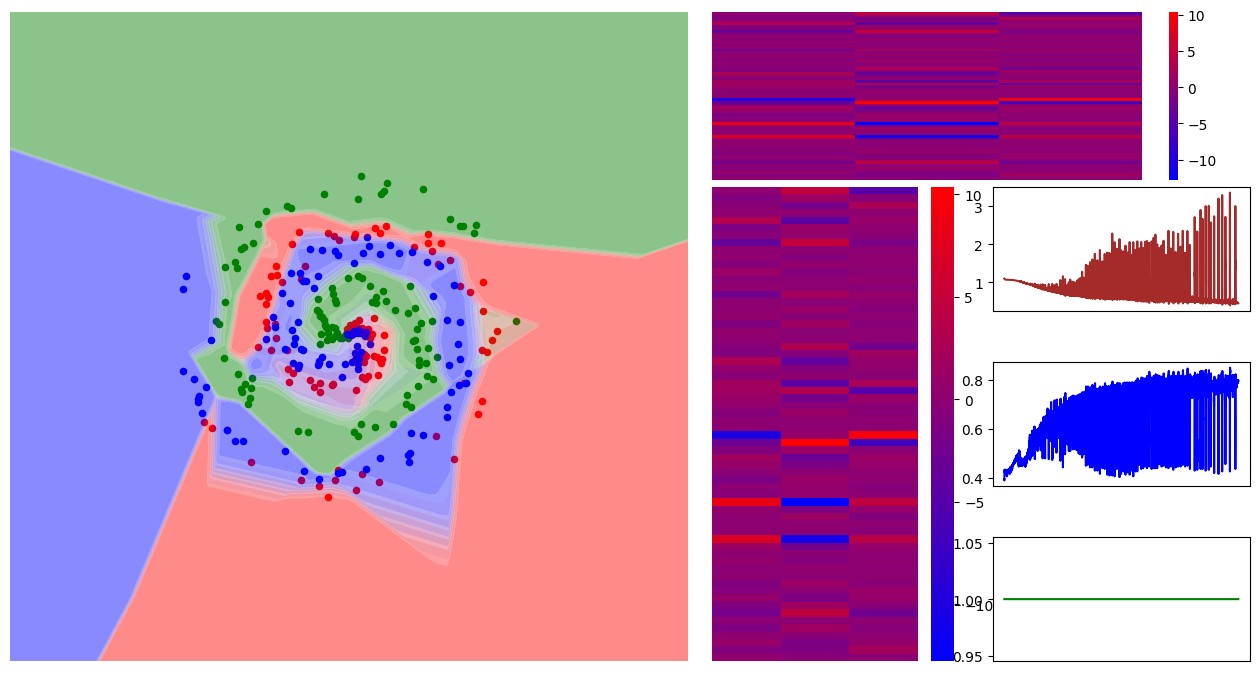

In [22]:
fig = plt.figure(figsize=(16, 9))

# Create subplots using subplot2grid
ax1 = plt.subplot2grid((16, 9), (0, 0), colspan=5, rowspan=15)  # Main image
ax2 = plt.subplot2grid((16, 9), (0, 5), colspan=4, rowspan=4)   # Top right
ax3 = plt.subplot2grid((16, 9), (4, 5), colspan=2, rowspan=11)   # Middle right
ax4 = plt.subplot2grid((16, 9), (4, 7), colspan=2, rowspan=3)  # Bottom right
ax5 = plt.subplot2grid((16, 9), (8, 7), colspan=2, rowspan=3)  # Bottom right
ax6 = plt.subplot2grid((16, 9), (12, 7), colspan=2, rowspan=3)  # Bottom right

visualize_model_decision_boundaries(model, 
                                    X, 
                                    y, 
                                    ['red', 'green', 'blue'], 
                                    0.01, 
                                    title="Non-linear decision boundary with spiral data", 
                                    ax=ax1)

sns.heatmap(model.dense_2.weights, cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'red']), ax=ax2)
sns.heatmap(model.dense_2.weights, cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'red']), ax=ax3)

ax4.plot(loss_arr, color='brown')
ax5.plot(accuracy_arr, color='blue')
ax6.plot(learning_rate_arr, color='green')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.xaxis.set_visible(False)
ax5.xaxis.set_visible(False)
ax6.xaxis.set_visible(False)

plt.show()